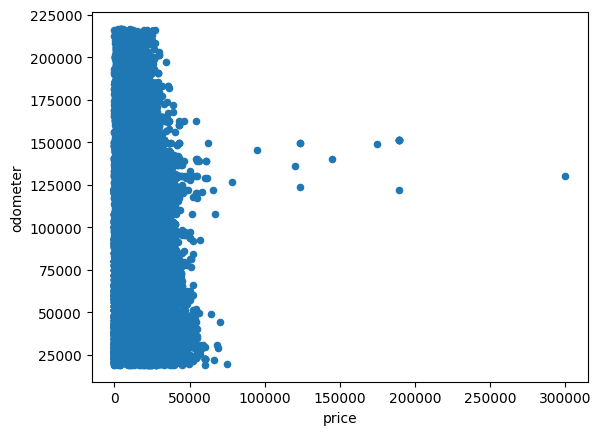

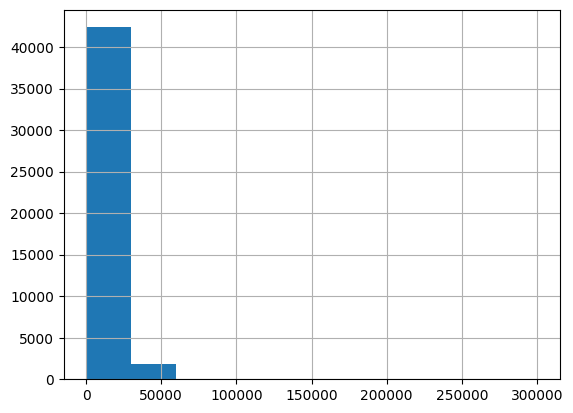

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [21]:

#Title 
# :car sales advertisements web app

#/Introduction
# given a vehicle advertisment data set use EDA to get a better understand the data. 
# then preprocess the data. next create some graphs to better visulize the data.
#  then use the streamlit libary to create a web app with a histogram  and sctter 
# plot of the datathrough render develop and deploy a web application to a cloud service

# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as date
import scipy.stats as stats
import streamlit as st
import plotly.express as px
import altair as alt





# import data
vehicles = pd.read_csv(r"..\vehicles_us.csv")
#remove duplicates
vehicles.drop_duplicates(inplace=True)
#preprocess the data

vehicles['model_year'] = vehicles['model_year'].fillna(vehicles.groupby('model')['model_year'].transform('median').round())
vehicles['cylinders'] = vehicles['cylinders'].fillna(vehicles.groupby('model')['cylinders'].transform('median').round())
vehicles['odometer'] = vehicles['odometer'].fillna(vehicles.groupby('model')['odometer'].transform('median').round())

vehicles = vehicles[(vehicles['odometer'] <= vehicles['odometer'].quantile(0.95)) & (vehicles['odometer'] >= vehicles['odometer'].quantile(0.05)) &(vehicles['model_year']<= vehicles['model_year'].quantile(0.95))& (vehicles['model_year']>= vehicles['model_year'].quantile(0.05))] 



 #graphs
vehicles.plot.scatter(x = 'price', y = 'odometer')
plt.show()
vehicles['price'].hist()
plt.show()
#data
vehicles
#conclusions there are 100 vehicle models being sold majority of which cost between 50,000- 750,000 with odometer  on carrs ranging from 0-45,000 miles
